In [1]:
%matplotlib inline

import os
import sys
import math
import tables as tb
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors

In [2]:
import invisible_cities.reco.dst_functions as dstf
import invisible_cities.core.fit_functions as fitf
import antea.database.load_db              as db

from   invisible_cities.core .stat_functions    import poisson_sigma
from   invisible_cities.core .system_of_units_c import units
from   invisible_cities.io   .dst_io            import load_dst

In [3]:
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 13, 11

In [45]:
true_r1, true_phi1, true_z1 = [], [], []
reco_r1, reco_phi1, reco_z1 = [], [], []
true_r2, true_phi2, true_z2 = [], [], []
reco_r2, reco_phi2, reco_z2 = [], [], []
events = []
sns_response1, sns_response2 = [], []
true_t1, true_t2 = [], []
sipm_t1, sipm_t2         = [[] for i in range(4)], [[] for i in range(4)]
first_sipm1, first_sipm2 = [[] for i in range(4)], [[] for i in range(4)]
phot1, phot2, phot_like1, phot_like2 = [], [], [], []
true_dep_e1, true_dep_e2 = [], []

#filepath = '/data5/users/carmenromo/fastmc/data_extract_true_reco_info_full_body_exp_dist_tof/data_coincidences_phot_info_dist_tof_dif_thr_charge/'
filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/0-1000/'
#filepath = '/Users/carmenromoluque/Desktop/'

list_coinc = []
for filename in os.listdir(filepath):
    #if filename.endswith('00_5_2_4_4_2.npz'):
    if filename.endswith('_2_4_4_2.npz'):
        #print(filename)
        my_file = filepath+filename
        d   = np.load(my_file)
            
        true_r1   = np.concatenate((true_r1,   d['a_true_r1']))
        true_phi1 = np.concatenate((true_phi1, d['a_true_phi1']))
        true_z1   = np.concatenate((true_z1,   d['a_true_z1']))   
            
        reco_r1   = np.concatenate((reco_r1,   d['a_reco_r1']))
        reco_phi1 = np.concatenate((reco_phi1, d['a_reco_phi1']))  
        reco_z1   = np.concatenate((reco_z1,   d['a_reco_z1']))  
        
        true_r2   = np.concatenate((true_r2,   d['a_true_r2']))
        true_phi2 = np.concatenate((true_phi2, d['a_true_phi2']))
        true_z2   = np.concatenate((true_z2,   d['a_true_z2']))   
            
        reco_r2   = np.concatenate((reco_r2,   d['a_reco_r2']))
        reco_phi2 = np.concatenate((reco_phi2, d['a_reco_phi2']))  
        reco_z2   = np.concatenate((reco_z2,   d['a_reco_z2']))  
        
        true_t1 = np.concatenate((true_t1, d['a_true_time1']))
        true_t2 = np.concatenate((true_t2, d['a_true_time2']))
        
        
        sns_response1 = np.concatenate((sns_response1, d['a_sns_response1']))
        sns_response2 = np.concatenate((sns_response2, d['a_sns_response2']))
        
        phot1       = np.concatenate((phot1, d['a_photo1']))
        phot2       = np.concatenate((phot2, d['a_photo2']))
        phot_like1  = np.concatenate((phot_like1, d['a_photo_like1']))
        phot_like2  = np.concatenate((phot_like2, d['a_photo_like2']))
        true_dep_e1 = np.concatenate((true_dep_e1, d['a_hit_energy1']))
        true_dep_e2 = np.concatenate((true_dep_e2, d['a_hit_energy2']))
        
        events = np.concatenate((events, d['a_event_ids']))
        
        for i in range(4):
            sipm_t1[i] = np.concatenate((sipm_t1[i], d[f'a_first_time1_thr{i}']))
            sipm_t2[i] = np.concatenate((sipm_t2[i], d[f'a_first_time2_thr{i}']))
            
            first_sipm1[i] = np.concatenate((first_sipm1[i], d[f'a_first_sipm1_thr{i}']))
            first_sipm2[i] = np.concatenate((first_sipm2[i], d[f'a_first_sipm2_thr{i}']))

        
true_r1   = np.array(true_r1)
true_phi1 = np.array(true_phi1)
true_z1   = np.array(true_z1)

reco_r1   = np.array(reco_r1)
reco_phi1 = np.array(reco_phi1)
reco_z1   = np.array(reco_z1)

true_r2   = np.array(true_r2)
true_phi2 = np.array(true_phi2)
true_z2   = np.array(true_z2)

reco_r2   = np.array(reco_r2)
reco_phi2 = np.array(reco_phi2)
reco_z2   = np.array(reco_z2)

true_t1 = np.array(true_t1) 
sipm_t1 = np.array(sipm_t1)
true_t2 = np.array(true_t2)
sipm_t2 = np.array(sipm_t2)
first_sipm1 = np.array(first_sipm1)
first_sipm2 = np.array(first_sipm2)

sns_response1 = np.array(sns_response1)
sns_response2 = np.array(sns_response2)

phot1 = np.array(phot1)
phot2 = np.array(phot2)
phot_like1 = np.array(phot_like1)
phot_like2 = np.array(phot_like2)
true_dep_e1 = np.array(true_dep_e1)
true_dep_e2 = np.array(true_dep_e2)

events = np.array(events)

true_x1 = true_r1 * np.cos(true_phi1)
reco_x1 = reco_r1 * np.cos(reco_phi1)
true_y1 = true_r1 * np.sin(true_phi1)
reco_y1 = reco_r1 * np.sin(reco_phi1)
true_x2 = true_r2 * np.cos(true_phi2)
reco_x2 = reco_r2 * np.cos(reco_phi2)
true_y2 = true_r2 * np.sin(true_phi2)
reco_y2 = reco_r2 * np.sin(reco_phi2)

In [46]:
print('Number of reconstructed coincidences: {0}'.format(len(events)))

Number of reconstructed coincidences: 300575


In [47]:
### change by hand phi reconstructed as true=~3.14, reco~=-3.14
reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.] = -reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.]
reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.] = -reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.]

true_x = np.concatenate((true_x1, true_x2))
true_y = np.concatenate((true_y1, true_y2))
true_r   = np.concatenate((true_r1, true_r2))
true_phi = np.concatenate((true_phi1, true_phi2))
true_z   = np.concatenate((true_z1, true_z2))

reco_x = np.concatenate((reco_x1, reco_x2))
reco_y = np.concatenate((reco_y1, reco_y2))
reco_r   = np.concatenate((reco_r1, reco_r2))
reco_phi = np.concatenate((reco_phi1, reco_phi2))
reco_z   = np.concatenate((reco_z1, reco_z2))

true_t = np.concatenate((true_t1, true_t2))

sns_response = np.concatenate((sns_response1, sns_response2))
phot         = np.concatenate((phot1, phot2))
phot_like    = np.concatenate((phot_like1, phot_like2))
true_dep_e   = np.concatenate((true_dep_e1, true_dep_e2))

n_int = len(true_x) # number of interactions

In [48]:
d1 = true_r1 - reco_r1
d2 = true_r2 - reco_r2
diff_r_matrix = np.concatenate((d1, d2))

d1_phi = true_phi1 - reco_phi1
d2_phi = true_phi2 - reco_phi2
diff_phi_matrix = np.concatenate((d1_phi, d2_phi))

d1_z = true_z1 - reco_z1
d2_z = true_z2 - reco_z2
diff_z_matrix = np.concatenate((d1_z, d2_z))

In [49]:
### read sensor positions from database
DataSiPM     = db.DataSiPMsim_only('petalo', 0)
DataSiPM_idx = DataSiPM.set_index('SensorID')

speed_in_vacuum = 0.299792458# * units.mm / units.ps
ave_speed_in_LXe = 0.210 #* units.mm / units.ps

In [50]:
### Positions
pos_1 = np.array([reco_x1, reco_y1, reco_z1]).transpose()
pos_2 = np.array([reco_x2, reco_y2, reco_z2]).transpose()
dist1 = [[] for j in range(4)]
dist2 = [[] for j in range(4)]
for j in range(4):
    sipm_pos_1 = np.array([DataSiPM_idx.loc[first_sipm1[j]].X, DataSiPM_idx.loc[first_sipm1[j]].Y, DataSiPM_idx.loc[first_sipm1[j]].Z]).transpose()
    sipm_pos_2 = np.array([DataSiPM_idx.loc[first_sipm2[j]].X, DataSiPM_idx.loc[first_sipm2[j]].Y, DataSiPM_idx.loc[first_sipm2[j]].Z]).transpose()

    ### Distance of the interaction point from the SiPM seeing the first photon
    dist1[j].append(np.linalg.norm(np.subtract(pos_1, sipm_pos_1), axis=1))
    dist2[j].append(np.linalg.norm(np.subtract(pos_2, sipm_pos_2), axis=1))

In [51]:
diff_t_matrix      = [[] for j in range(4)]
diff_reco_t_matrix = [[] for j in range(4)]
for j in range(4):
    d1_t = true_t1 - sipm_t1[j]
    d2_t = true_t2 - sipm_t2[j]
    diff_t_matrix[j].append((np.concatenate((d1_t, d2_t))).flatten())
    
    reco_t1   = np.array(sipm_t1[j]) - (np.array(dist1[j])/ave_speed_in_LXe)
    reco_t2   = np.array(sipm_t2[j]) - (np.array(dist2[j])/ave_speed_in_LXe)
    d1_reco_t = true_t1 - reco_t1
    d2_reco_t = true_t2 - reco_t2
    diff_reco_t_matrix[j].append((np.concatenate((d1_reco_t, d2_reco_t))).flatten())

In [52]:
min(diff_reco_t_matrix[2][0])

-2630.916103754079

In [53]:
print('Fraction of photoelectric interactions = {0}'    .format(len(phot[phot == True])/n_int))
print('Fraction of not photoelectric interactions = {0}'.format(len(phot[phot == False])/n_int))

Fraction of photoelectric interactions = 0.04120435831323297
Fraction of not photoelectric interactions = 0.958795641686767


In [54]:
##NEST
print('Fraction of photo-like interactions = {0}'.format(len(phot_like[phot_like == True])/n_int))
print('Fraction of not photo-like interactions = {0}'.format(len(phot_like[phot_like == False])/n_int))

print('Fraction of true photo not recognized as such = {0}'.format(len(phot[(phot == True) & (phot_like == False)])/n_int))
print('Fraction of not true photo that looks like photo = {0}'.format(len(phot_like[(phot == False) & (phot_like == True)])/n_int))

Fraction of photo-like interactions = 0.31757298511186893
Fraction of not photo-like interactions = 0.6824270148881311
Fraction of true photo not recognized as such = 0.0031922149214006486
Fraction of not true photo that looks like photo = 0.2795608417200366


In [55]:
sel_phot_like  = (phot_like == True)
sel_compt_like = (phot_like == False)

## Some inspection of photoelectrics

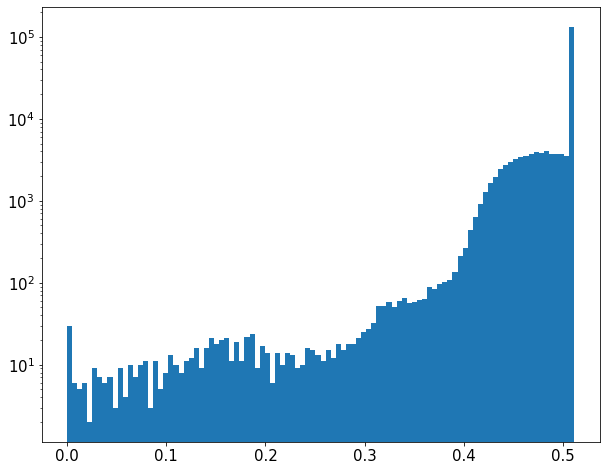

In [56]:
good_e = true_dep_e[sel_phot_like]
h = plt.hist(good_e, bins=100);
plt.yscale('log')

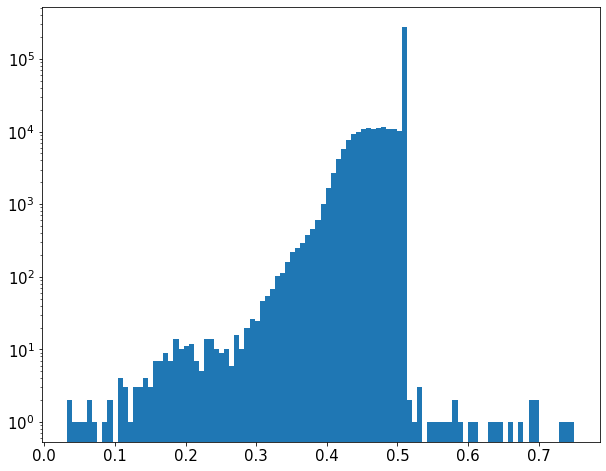

In [57]:
bad_e = true_dep_e[sel_compt_like]
h = plt.hist(bad_e, bins=100);
plt.yscale('log')

## Error matrices

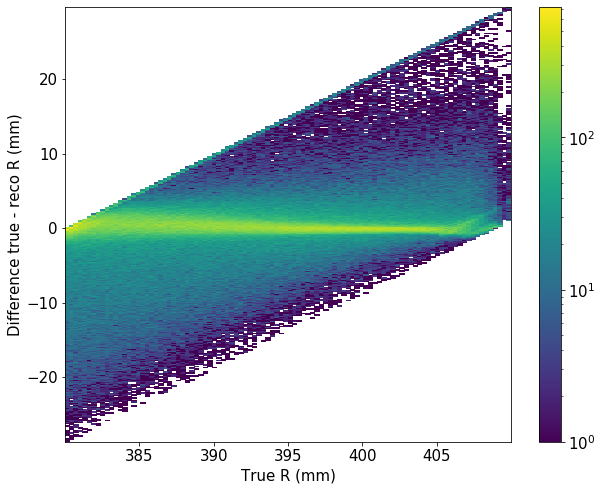

In [58]:
## all events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r, diff_r_matrix, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();
#plt.ylim(-5,5)

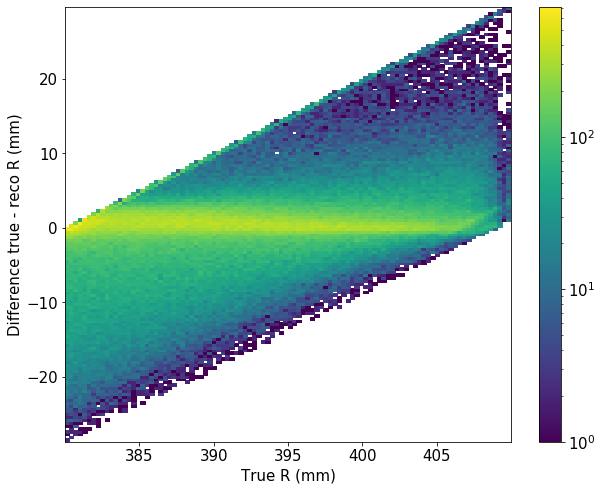

In [59]:
## not photoelectric-like events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_compt_like], \
                                            diff_r_matrix[sel_compt_like], \
                                            bins=(100, 150), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

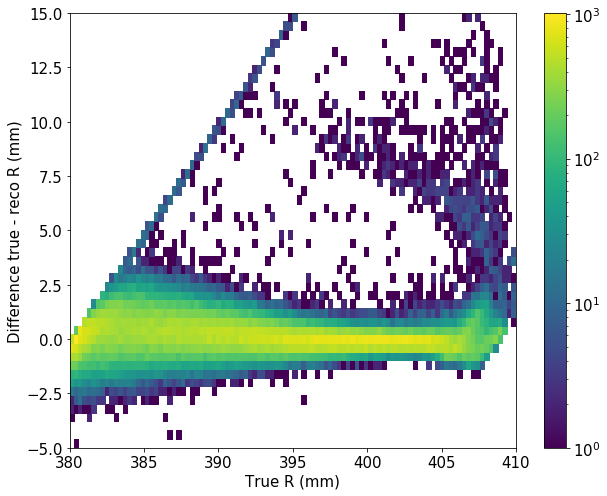

In [60]:
## photoelectric-like events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like], \
                                            diff_r_matrix[sel_phot_like], \
                                            bins=(100, 50), range=((380, 410), (-5, 15)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

In [61]:
# Save the error matrix for the fast MC.
#eff = len(true_z)/(len(D_true_z1) + len(D_true_z2)); eff = np.array(eff)
eff = np.array([1])
xmin = xedges_r[0]; xmin = np.array(xmin)
ymin = yedges_r[0]; ymin = np.array(ymin)
dx = xedges_r[1:]-xedges_r[:-1]; dx = np.array(dx[0])
dy = yedges_r[1:]-yedges_r[:-1]; dy = np.array(dy[0])
#np.savez("errmat_r_compt_like.npz", errmat=h_r, eff=eff, xmin=xmin, ymin=ymin, dx=dx, dy=dy)

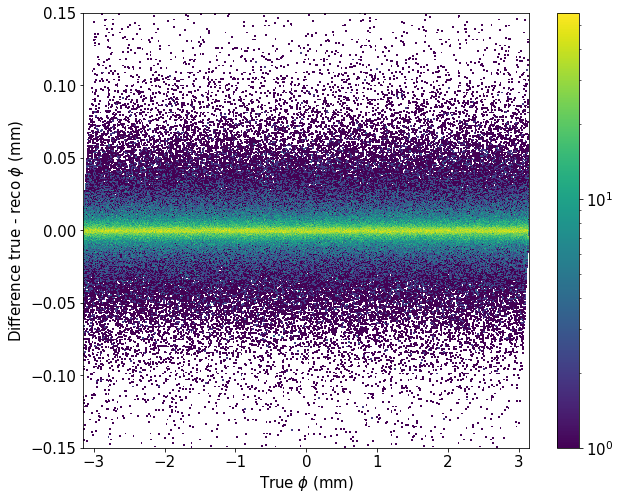

In [62]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_compt_like], diff_phi_matrix[sel_compt_like],
                                                    bins=(500, 500), range=((-3.15, 3.15), (-0.15, 0.15)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

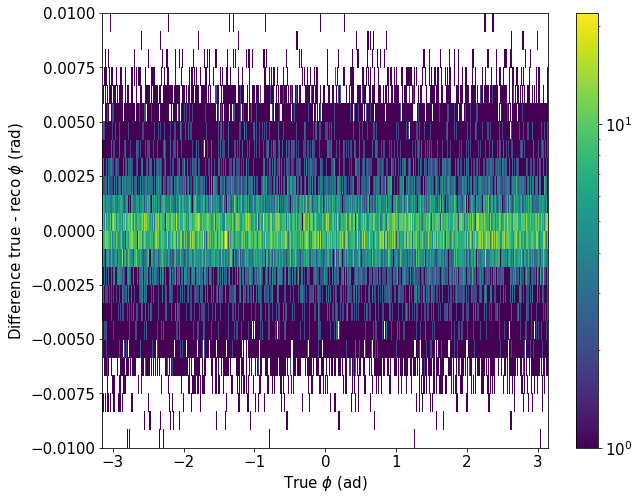

In [63]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_phot_like], diff_phi_matrix[sel_phot_like],
                                                    bins=(5166, 24), range=((-3.15, 3.15), (-0.010, 0.010)),# cmin=1)#,
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (rad)')
plt.xlabel('True $\phi$ (ad)');
plt.colorbar();

In [64]:
np.sum(h_phi,axis=1)

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
h_phi.shape

(5166, 24)

In [66]:
# Save the error matrix for the fast MC.
#eff = len(true_z)/(len(D_true_z1) + len(D_true_z2)); eff = np.array(eff)
eff  = np.array([1])
xmin = xedges_phi[0]; xmin = np.array(xmin)
ymin = yedges_phi[0]; ymin = np.array(ymin)
dx   = xedges_phi[1:]-xedges_phi[:-1]; dx = np.array(dx[0])
dy   = yedges_phi[1:]-yedges_phi[:-1]; dy = np.array(dy[0])
#np.savez("errmat_phi_compt_like.npz", errmat=h_phi, eff=eff, xmin=xmin, ymin=ymin, dx=dx, dy=dy)

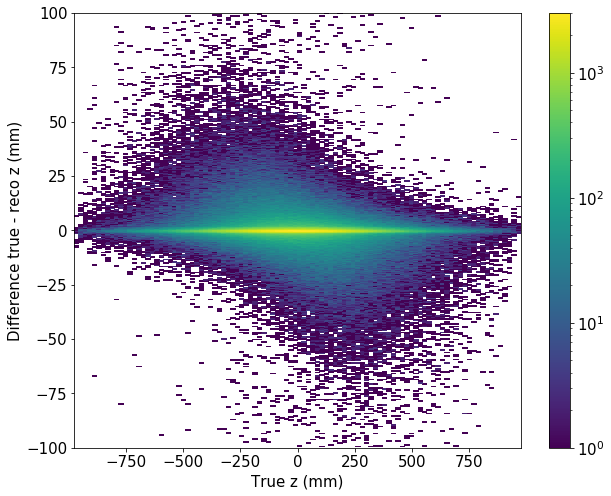

In [67]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z, diff_z_matrix, bins=(100, 500),\
                                                    range=((-975, 975), (-100, 100)),norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();


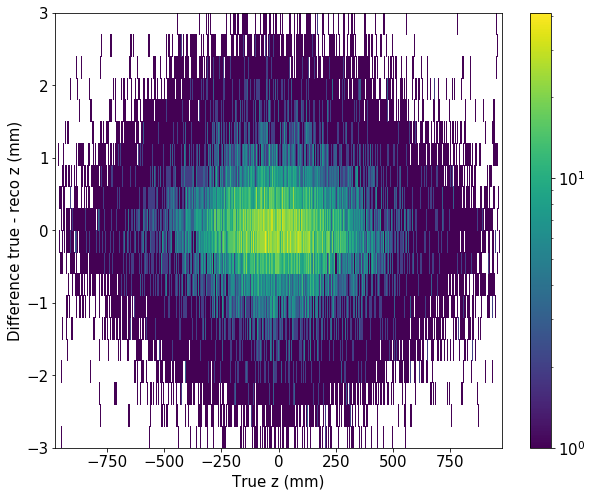

In [68]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_phot_like], diff_z_matrix[sel_phot_like], bins=(6500, 20),\
                                                    range=((-975, 975), (-3, 3)),norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

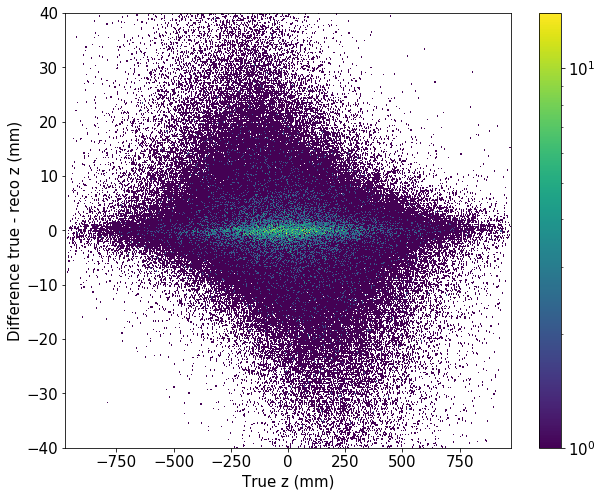

In [69]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_compt_like], diff_z_matrix[sel_compt_like], bins=(6500, 667),\
                                                    range=((-975, 975), (-40, 40)),norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

In [70]:
# Save the error matrix for the fast MC.
#eff = len(true_z)/(len(D_true_z1) + len(D_true_z2)); eff = np.array(eff)
eff  = np.array([1])
xmin = xedges_z[0]; xmin = np.array(xmin)
ymin = yedges_z[0]; ymin = np.array(ymin)
dx   = xedges_z[1:]-xedges_z[:-1]; dx = np.array(dx[0])
dy   = yedges_z[1:]-yedges_z[:-1]; dy = np.array(dy[0])
#np.savez("errmat_z_compt_like.npz", errmat=h_z, eff=eff, xmin=xmin, ymin=ymin, dx=dx, dy=dy)

In [71]:
print(len(true_t))
print(len(diff_t_matrix[0][0]))

601150
601150


In [72]:
min(true_t)

991.1837577819824

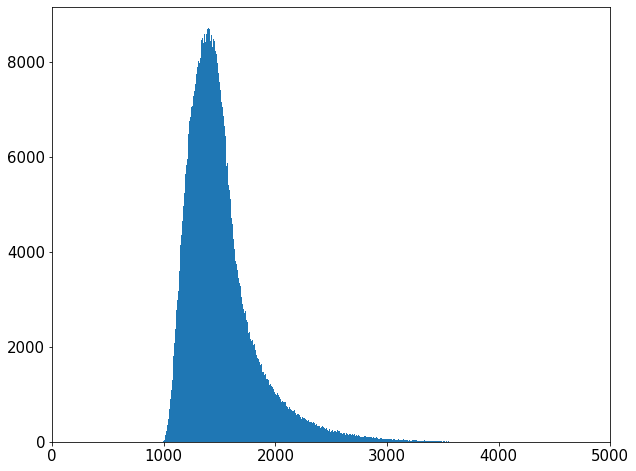

In [73]:
plt.hist(true_t, 600)
plt.xlim(0,5000);

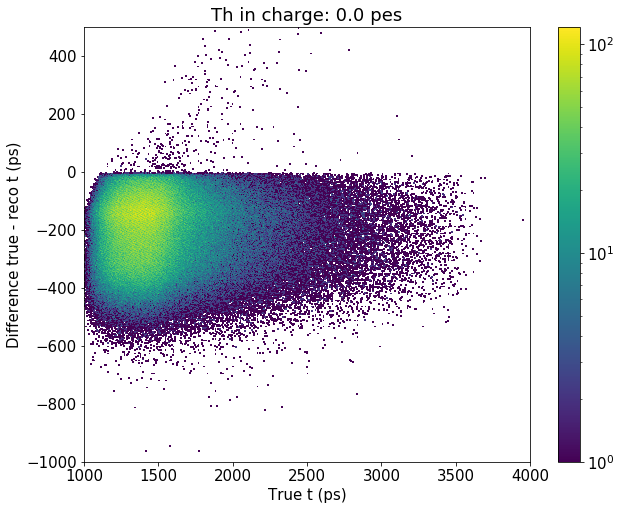

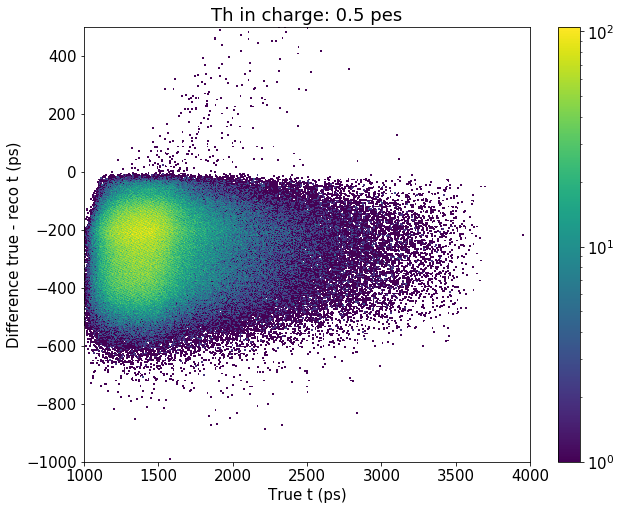

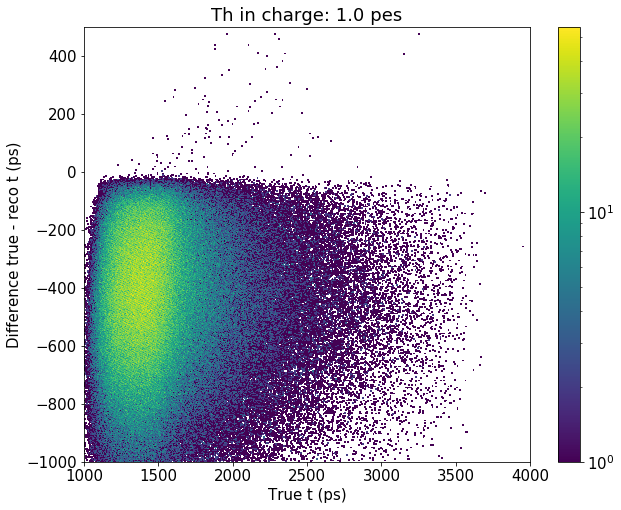

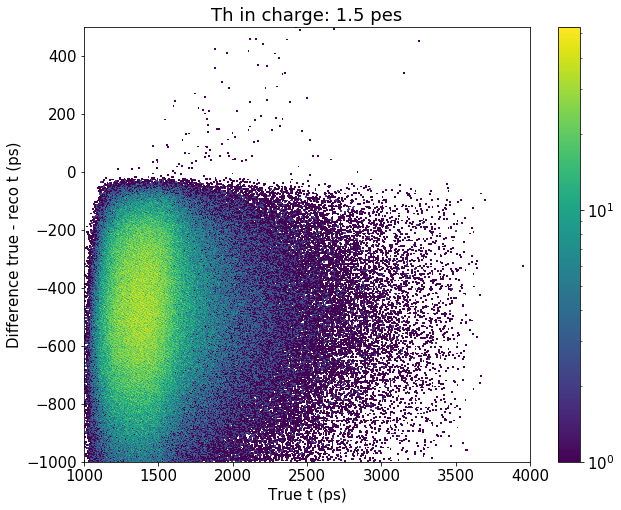

In [74]:
h_ts      = []
xedges_ts = []
yedges_ts = []
img_ts    = []
for j,th in enumerate(np.arange(0.,2, 0.5)):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_t_matrix[j][0], bins=(500, 500),
                                                range=((1000, 4000), (-1000, 500)),
                                                norm=mp_colors.LogNorm())
    h_ts     .append(h_t)
    xedges_ts.append(xedges_ts)
    yedges_ts.append(yedges_ts)
    img_ts   .append(img_ts)
    
    #plt.xlim(1000,6000)
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.rcParams["figure.figsize"] = 10, 8
    plt.colorbar()
    plt.show()

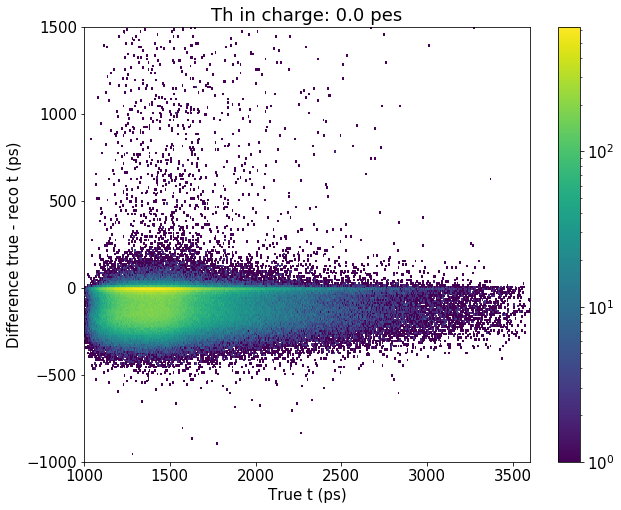

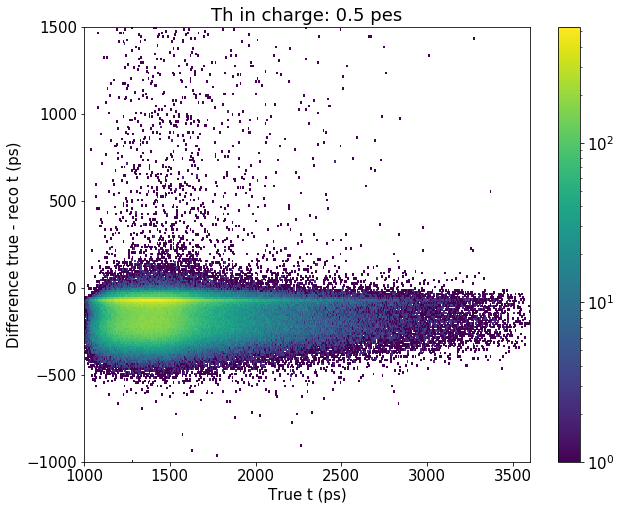

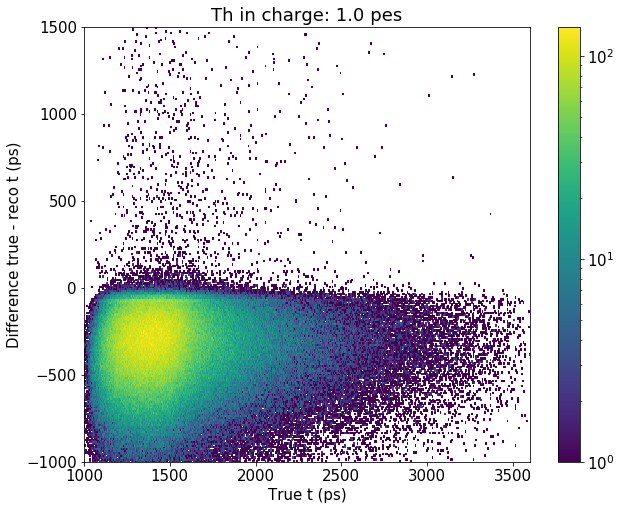

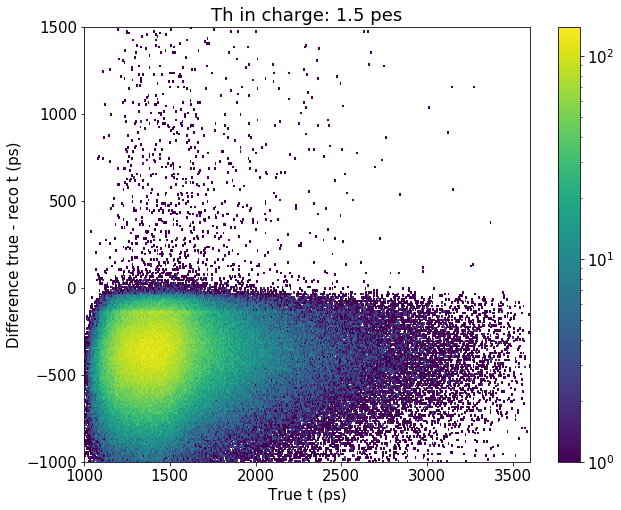

In [76]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_reco_t_matrix[j][0], bins=(500, 250),
                                                range=((1000, 3600), (-1000, 1500)),
                                                norm=mp_colors.LogNorm())
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.rcParams["figure.figsize"] = 10, 8
    plt.colorbar()
    plt.show()

In [77]:
len(diff_reco_t_matrix[0])

1

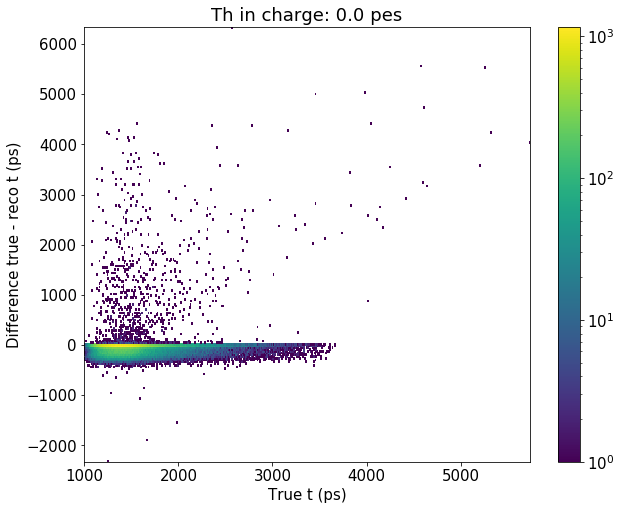

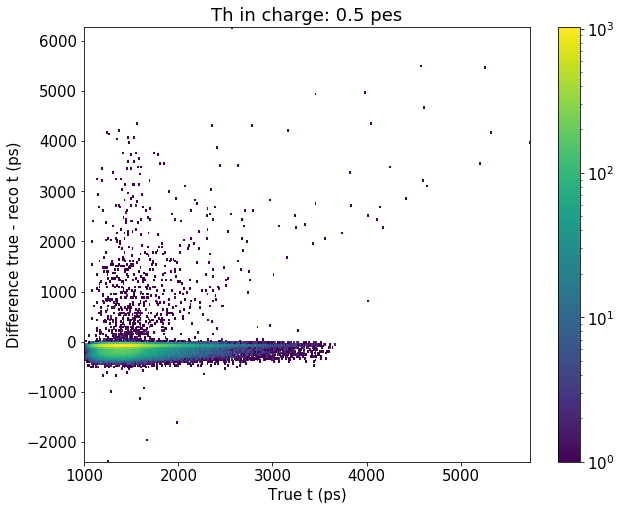

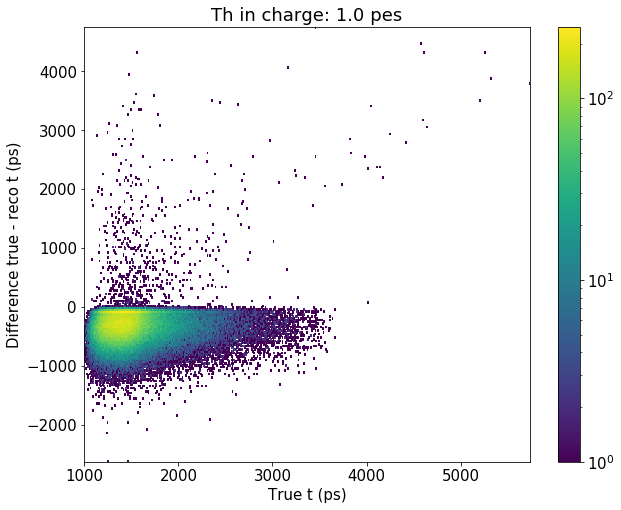

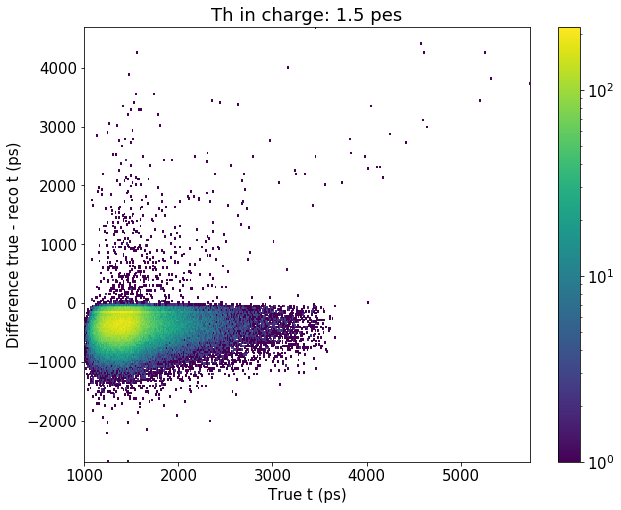

In [78]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_phot_like], diff_reco_t_matrix[j][0][sel_phot_like], bins=(500, 250),\
                                                norm=mp_colors.LogNorm())
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.rcParams["figure.figsize"] = 10, 8
    plt.colorbar()
    plt.show()

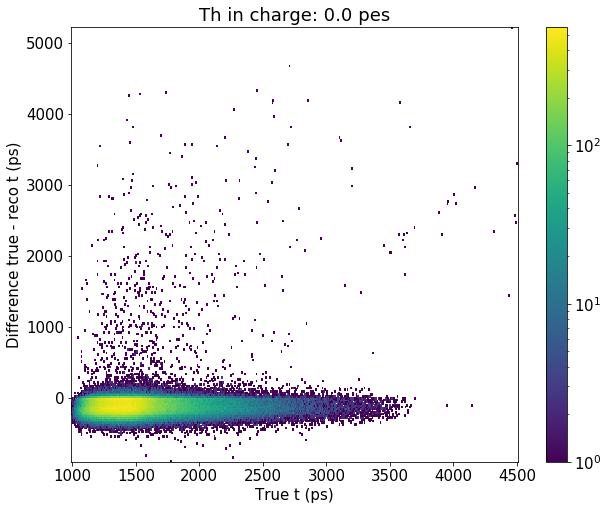

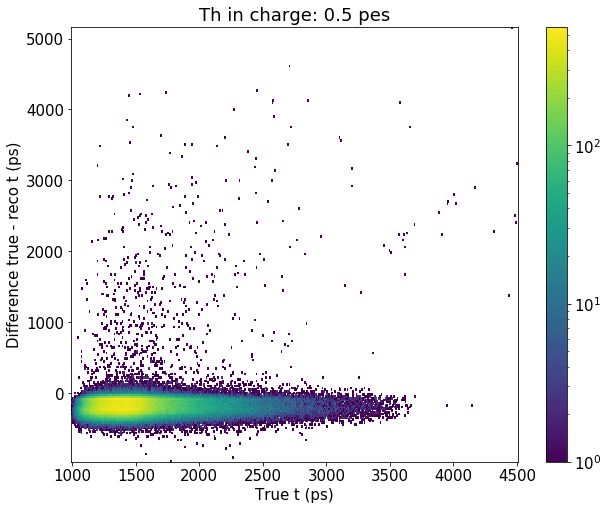

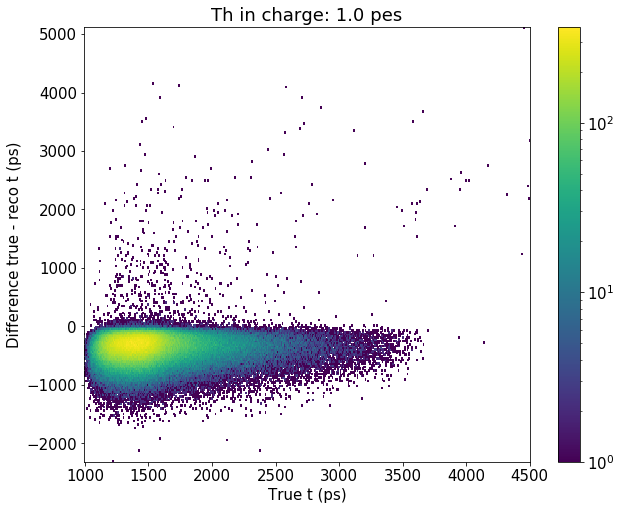

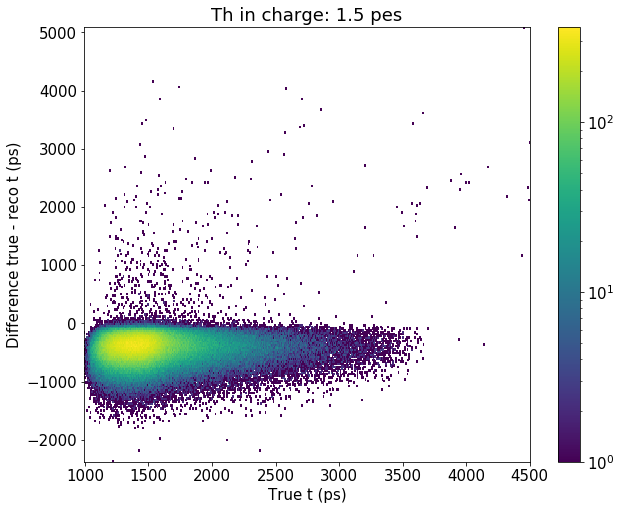

In [79]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like], diff_reco_t_matrix[j][0][sel_compt_like], bins=(500, 250),\
                                                norm=mp_colors.LogNorm())
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.rcParams["figure.figsize"] = 10, 8
    plt.colorbar()
    plt.show()

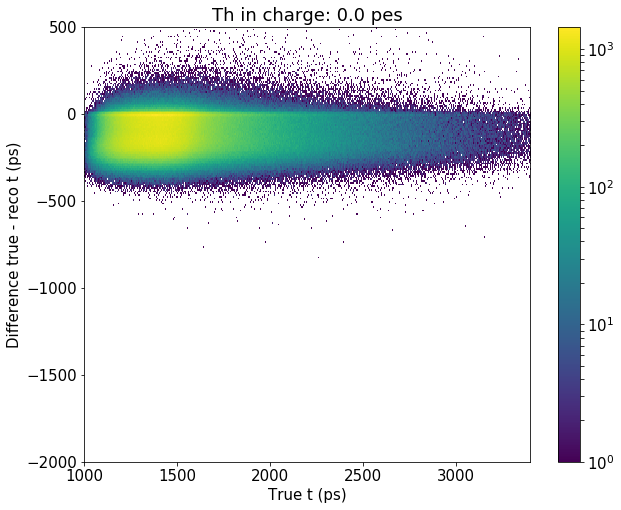

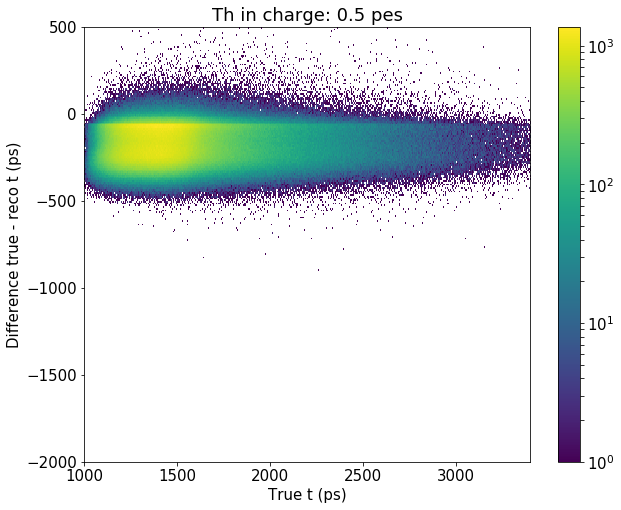

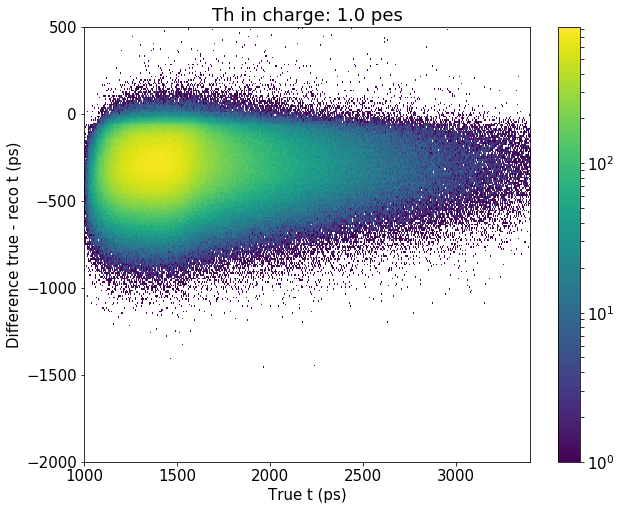

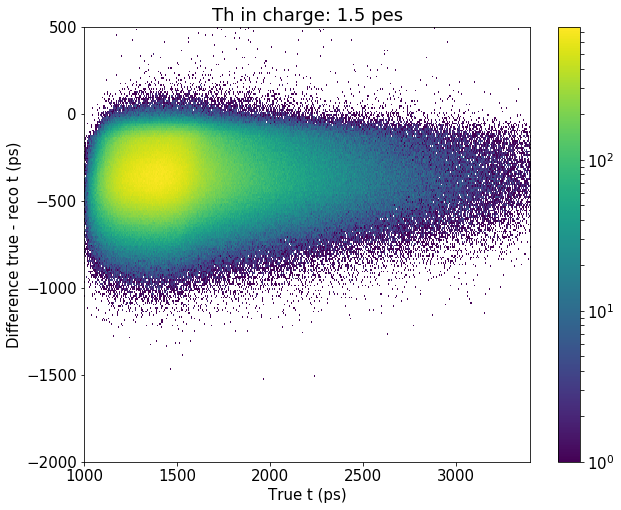

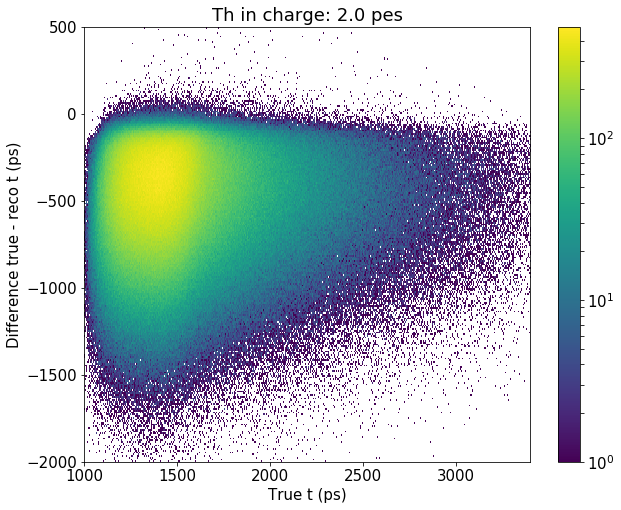

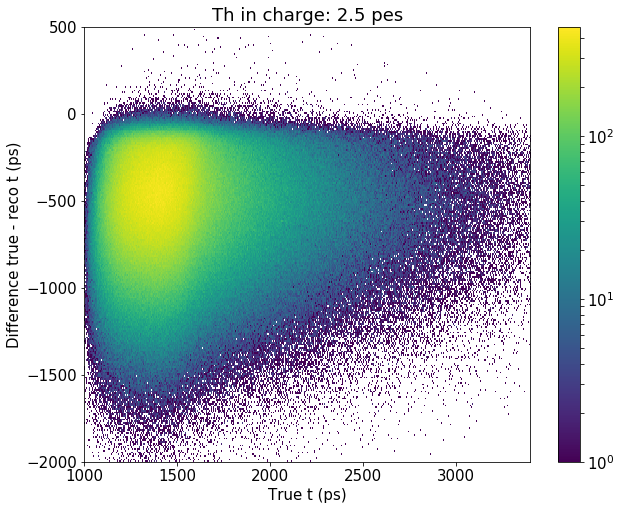

In [113]:
### OLD CASE


for j,th in enumerate(np.arange(0,2, 0.5)):
    h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like], diff_reco_t_matrix[j][0][sel_compt_like],
                                                bins=(500, 250), range=((1000, 3400), (-2000, 500)),
                                                norm=mp_colors.LogNorm())
    plt.ylabel('Difference true - reco t (ps)')
    plt.xlabel('True t (ps)');
    plt.title(f'Th in charge: {th} pes')
    plt.rcParams["figure.figsize"] = 10, 8
    plt.colorbar()
    plt.show()

In [43]:
np.sum(h_t,axis=1)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       8.5900e+02, 1.0562e+04, 1.7239e+04, 2.2008e+04, 2.5190e+04,
       2.8048e+04, 3.0588e+04, 3.2168e+04, 3.3690e+04, 3.5164e+04,
       3.6388e+04, 3.7699e+04, 3.8298e+04, 3.8846e+04, 3.9596e+04,
       3.9857e+04, 4.0183e+04, 4.0729e+04, 4.0400e+04, 4.0418e

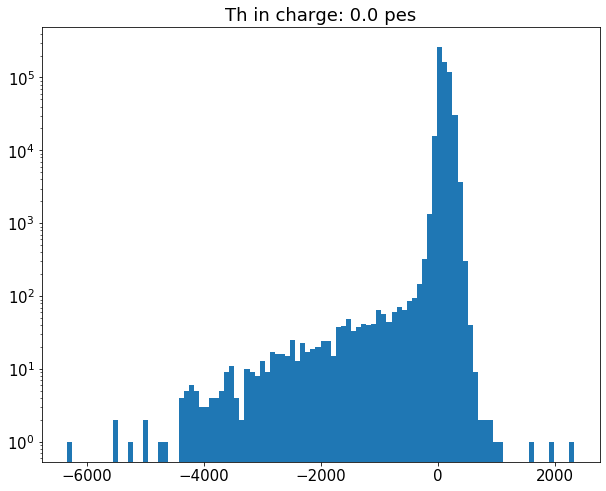

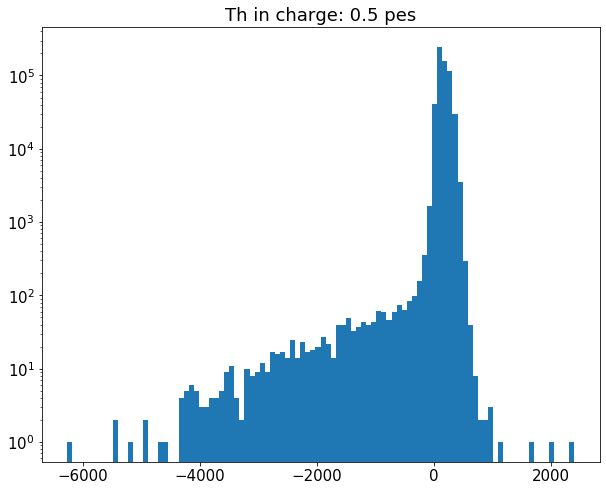

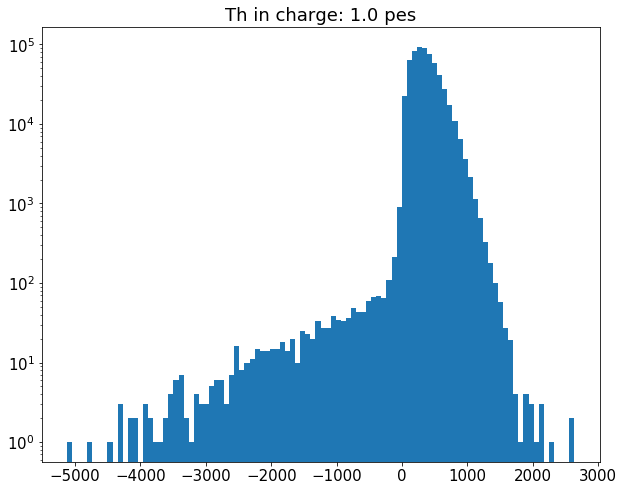

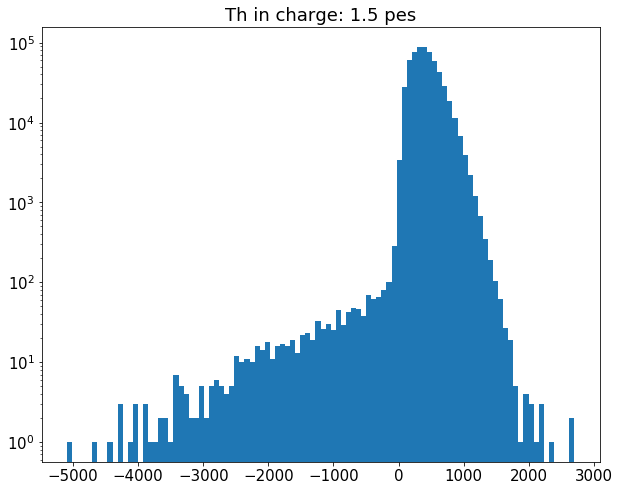

In [80]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    plt.hist(-diff_reco_t_matrix[j][0], bins=100)
    plt.title(f'Th in charge: {th} pes')
    plt.yscale('log')
    plt.show()

In [81]:
# Save the error matrix for the fast MC.
#eff = len(true_t)/(len(D_true_t1) + len(D_true_t2)); eff = np.array(eff)
eff  = np.array([1])
xmin = xedges_t[0]; xmin = np.array(xmin)
ymin = yedges_t[0]; ymin = np.array(ymin)
dx   = xedges_t[1:]-xedges_t[:-1]; dx = np.array(dx[0])
dy   = yedges_t[1:]-yedges_t[:-1]; dy = np.array(dy[0])
#np.savez("errmat_t_compt_like.npz", errmat=h_t, eff=eff, xmin=xmin, ymin=ymin, dx=dx, dy=dy)

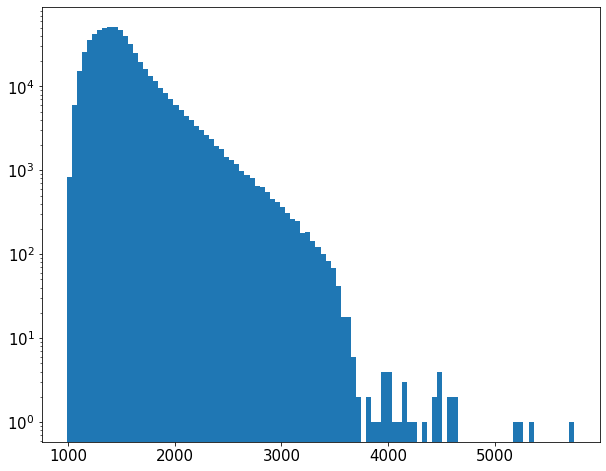

In [82]:
h = plt.hist(true_t, bins=100)
plt.yscale('log');

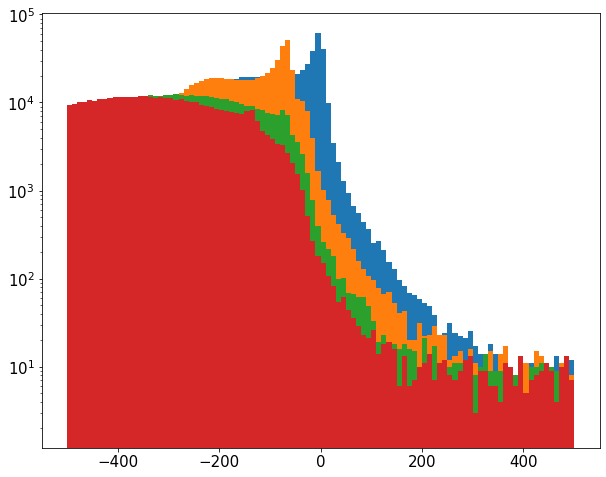

In [83]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    h = plt.hist(diff_reco_t_matrix[j], bins=100, range=(-500, 500))
    plt.yscale('log');

In [84]:
len(diff_reco_t_matrix)

4

## Correlations

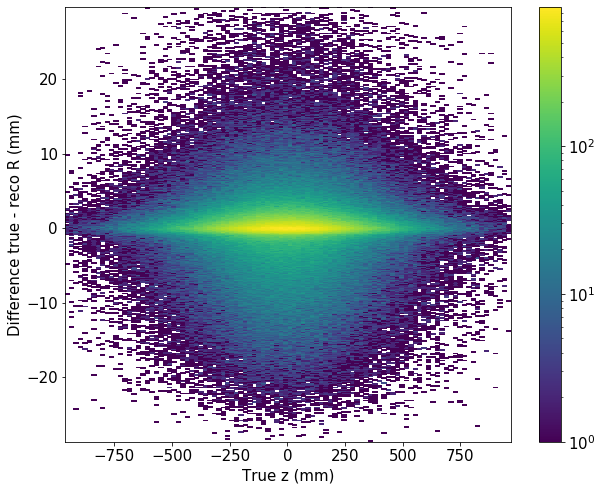

In [85]:
plt.hist2d(true_z, diff_r_matrix, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

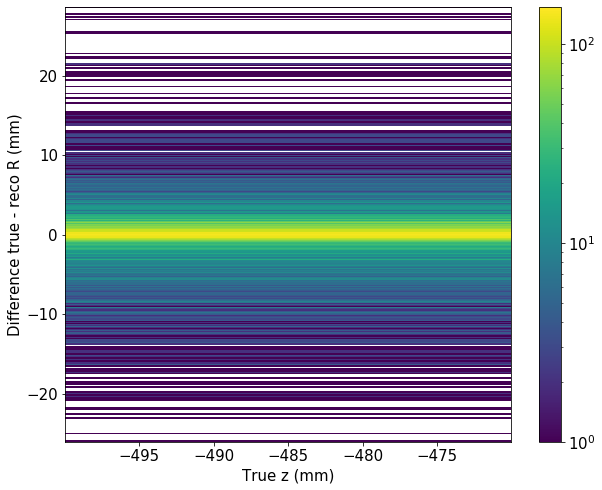

In [86]:
slice1    = (true_z>-500) & (true_z<-470)
z_sl1     = true_z[slice1]
err_r_sl1 = diff_r_matrix[slice1]

h1, xedges, yedges, img = plt.hist2d(z_sl1, err_r_sl1, bins=(1, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

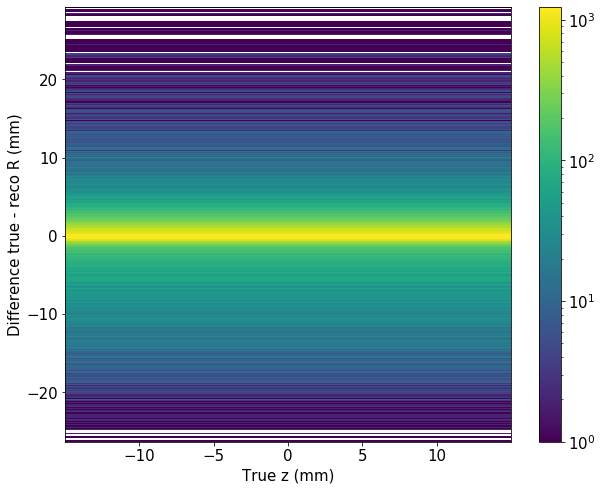

In [87]:
slice2    = (true_z>-15) & (true_z<15)
z_sl2     = true_z[slice2]
err_r_sl2 = diff_r_matrix[slice2]

h2, xedges, yedges, img = plt.hist2d(z_sl2, err_r_sl2, bins=(1, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

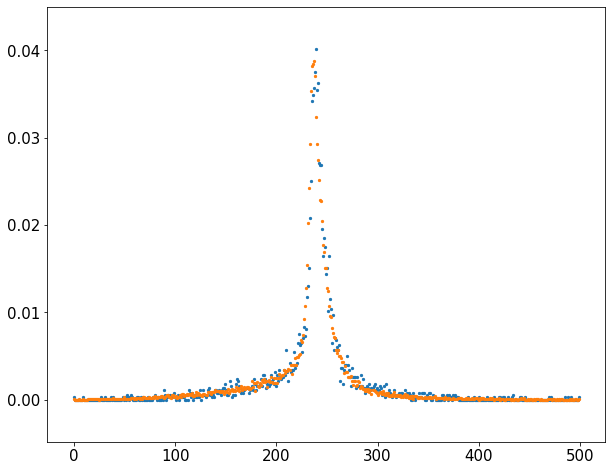

In [88]:
plt.scatter(list(range(len(h1[0]))), h1[0]/h1[0].sum(), s=5)
plt.scatter(list(range(len(h2[0]))), h2[0]/h2[0].sum(), s=5)

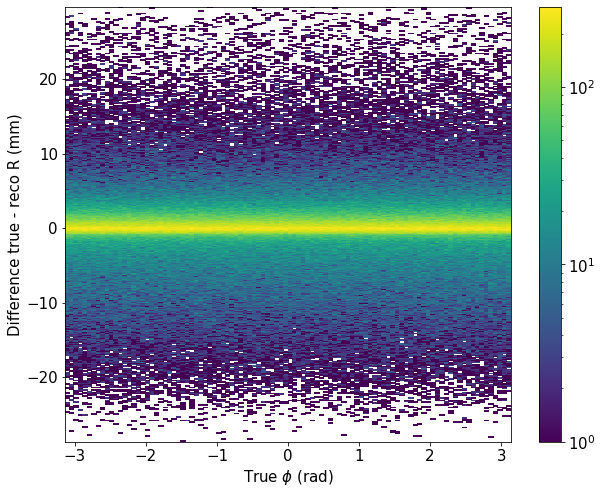

In [89]:
plt.hist2d(true_phi, diff_r_matrix, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True $\phi$ (rad)');
plt.colorbar();

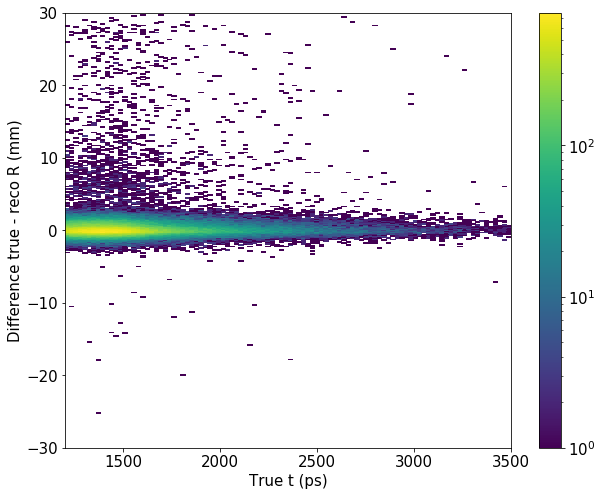

In [90]:
plt.hist2d(true_t[sel_phot_like], diff_r_matrix[sel_phot_like], bins=(100, 500), range=((1200, 3500), (-30, 30)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True t (ps)');
plt.colorbar();

In [91]:
true_t[sel_phot_like & (true_t>1500) & (true_t<1510) & (true_r>390) & (true_r<390.2)]

array([1509.33110714, 1500.71024895, 1508.20195675, 1509.04607773,
       1500.00715256, 1503.49545479, 1509.42933559, 1509.53507423,
       1505.45907021, 1506.67846203, 1508.16941261, 1505.46324253,
       1506.49297237, 1506.7909956 , 1503.90791893, 1507.40075111,
       1505.69939613, 1501.2845993 , 1502.19929218, 1501.4039278 ,
       1504.61161137, 1503.28791142, 1503.35860252, 1503.33976746])

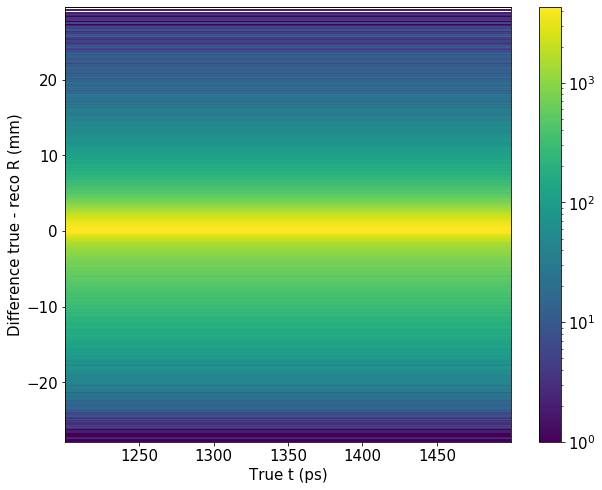

In [92]:
slice1    = (true_t>1200) & (true_t<1500) & sel_compt_like
t_sl1     = true_t[slice1]
err_r_sl1 = diff_r_matrix[slice1]

h1, xedges, yedges, img = plt.hist2d(t_sl1, err_r_sl1, bins=(1, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True t (ps)');
plt.colorbar();

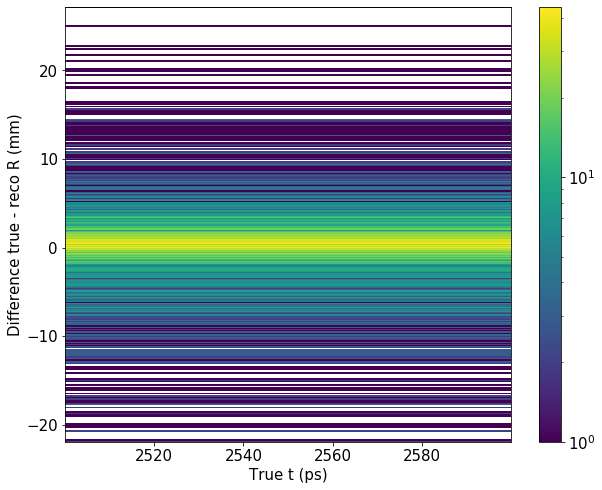

In [93]:
slice2    = (true_t>2500) & (true_t<2600) & sel_compt_like
t_sl2     = true_t[slice2]
err_r_sl2 = diff_r_matrix[slice2]

h2, xedges, yedges, img = plt.hist2d(t_sl2, err_r_sl2, bins=(1, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True t (ps)');
plt.colorbar();

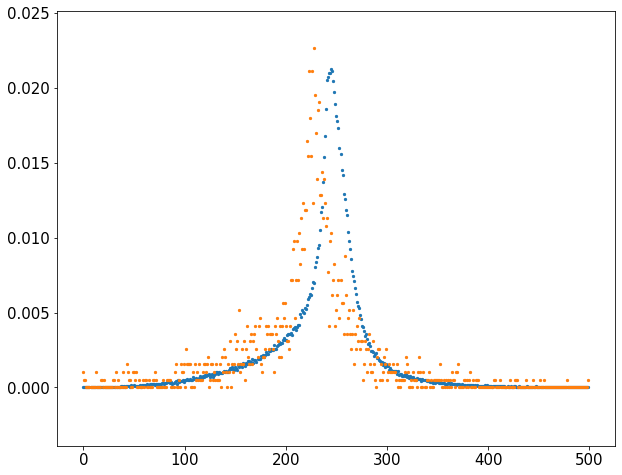

In [94]:
plt.scatter(list(range(len(h1[0]))), h1[0]/h1[0].sum(), s=5)
plt.scatter(list(range(len(h2[0]))), h2[0]/h2[0].sum(), s=5)

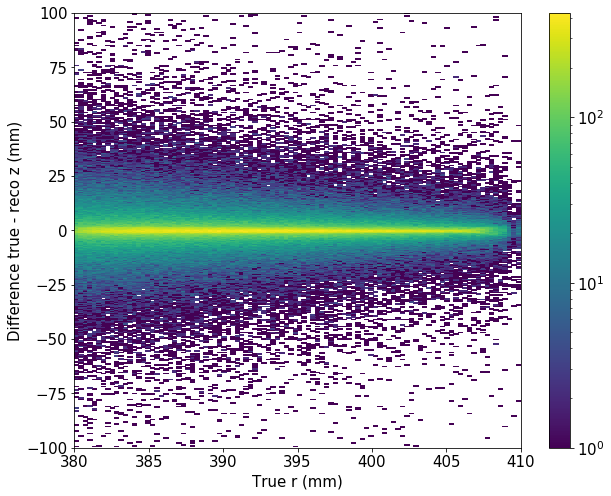

In [95]:
plt.hist2d(true_r[sel_compt_like], diff_z_matrix[sel_compt_like], bins=(100, 500), \
           range=((380, 410), (-100, 100)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True r (mm)');
plt.colorbar();

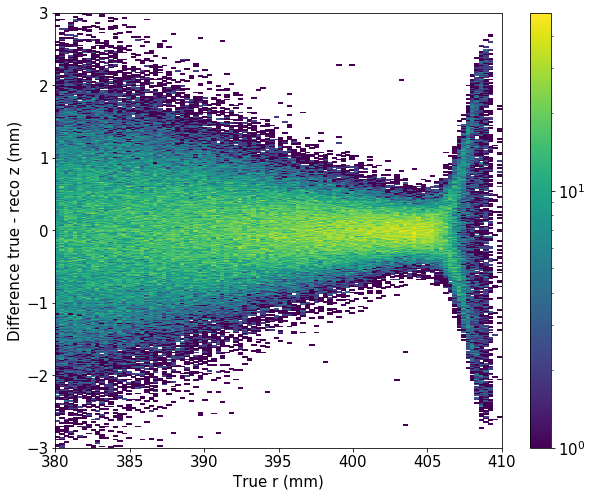

In [96]:
plt.hist2d(true_r[sel_phot_like], diff_z_matrix[sel_phot_like], bins=(100, 500), \
           range=((380, 410), (-3, 3)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True r (mm)');
plt.colorbar();

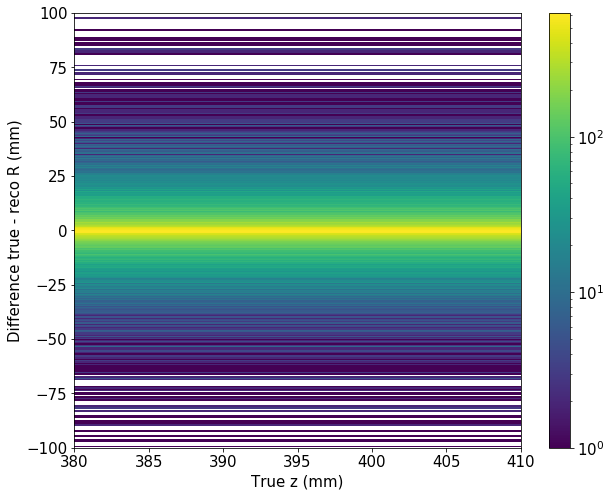

In [97]:
slice1    = (true_r>380) & (true_r<381) & sel_compt_like
r_sl1     = true_r[slice1]
err_z_sl1 = diff_z_matrix[slice1]

h1, xedges, yedges, img = plt.hist2d(r_sl1, err_z_sl1, bins=(1, 500), range=((380, 410), (-100, 100)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

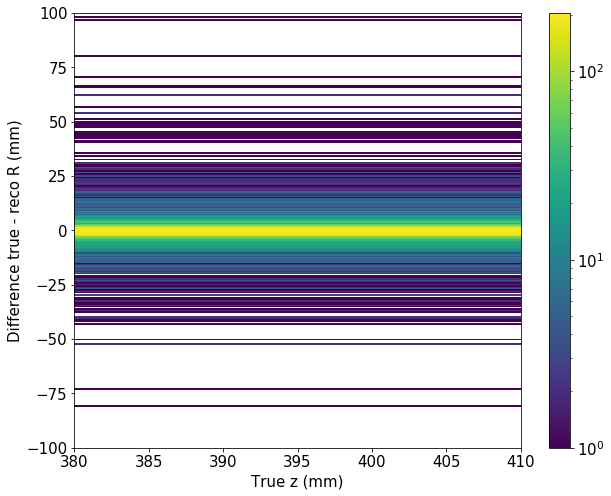

In [98]:
slice2    = (true_r>408) & (true_r<409) & sel_compt_like
r_sl2     = true_r[slice2]
err_z_sl2 = diff_z_matrix[slice2]

h2, xedges, yedges, img = plt.hist2d(r_sl2, err_z_sl2, bins=(1, 500), range=((380, 410), (-100, 100)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True z (mm)');
plt.colorbar();

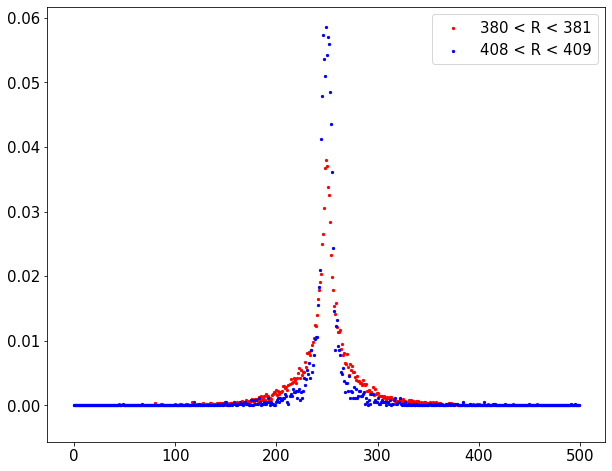

In [99]:
plt.scatter(list(range(len(h1[0]))), h1[0]/h1[0].sum(), s=5, c= 'red', label='380 < R < 381')
plt.scatter(list(range(len(h2[0]))), h2[0]/h2[0].sum(), s=5, c='blue', label='408 < R < 409')
plt.legend(loc=1)

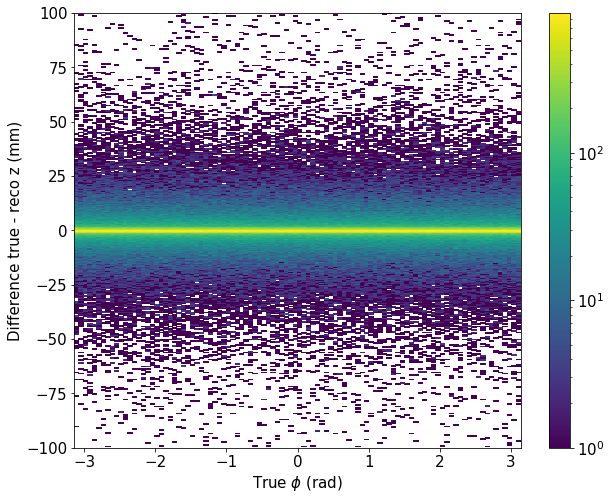

In [100]:
plt.hist2d(true_phi, diff_z_matrix, bins=(100, 500), range=((-3.14, 3.14), (-100, 100)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True $\phi$ (rad)');
plt.colorbar();

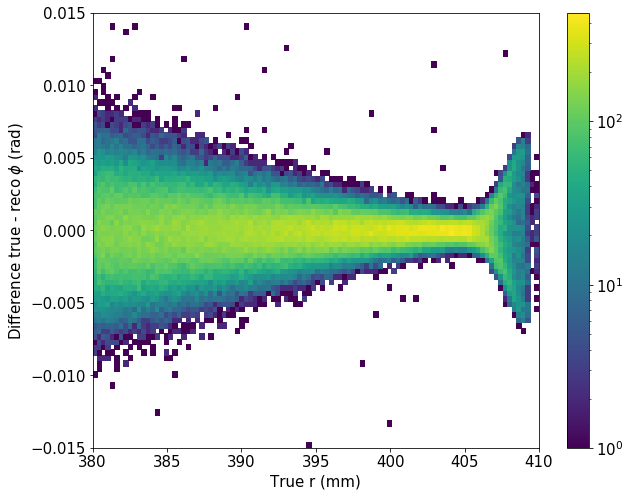

In [101]:
plt.hist2d(true_r[sel_phot_like], diff_phi_matrix[sel_phot_like], bins=(100, 80), 
           range=((380, 410), (-0.015, 0.015)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (rad)')
plt.xlabel('True r (mm)');
plt.colorbar();

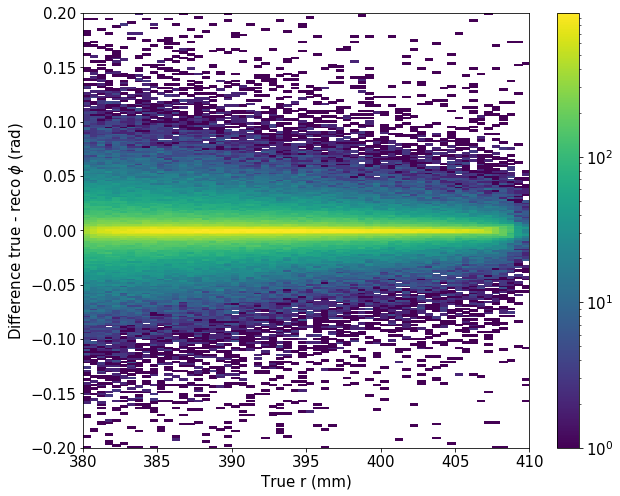

In [102]:
plt.hist2d(true_r[sel_compt_like], diff_phi_matrix[sel_compt_like], bins=(60, 246), 
           range=((380, 410), (-0.2, 0.2)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (rad)')
plt.xlabel('True r (mm)');
plt.colorbar();

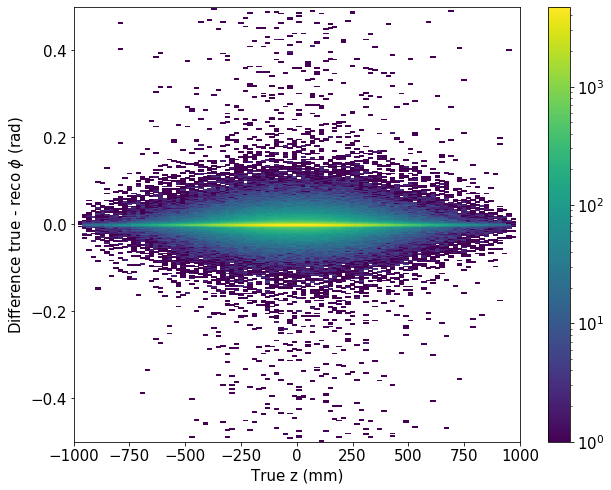

In [103]:
plt.hist2d(true_z, diff_phi_matrix, bins=(100, 500), range=((-1000, 1000), (-0.5, 0.5)), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (rad)')
plt.xlabel('True z (mm)');
plt.colorbar();

In [104]:
len(diff_reco_t_matrix[0])

1

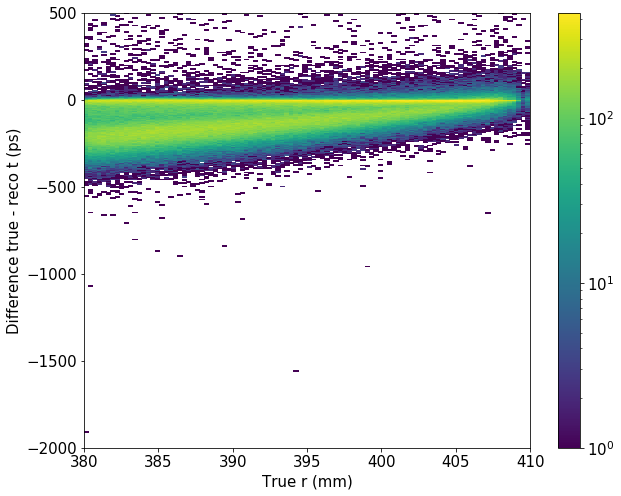

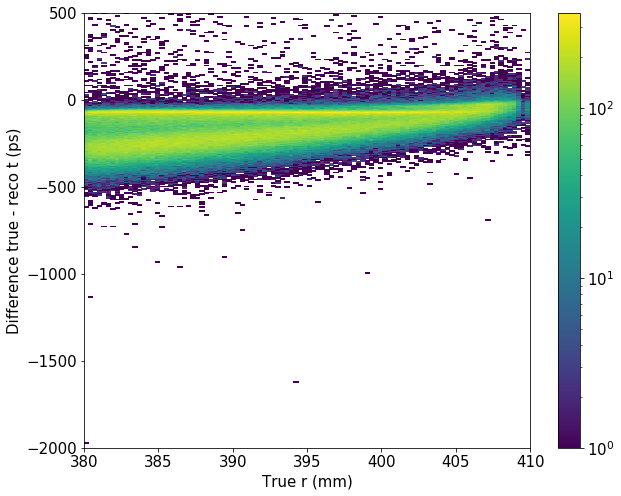

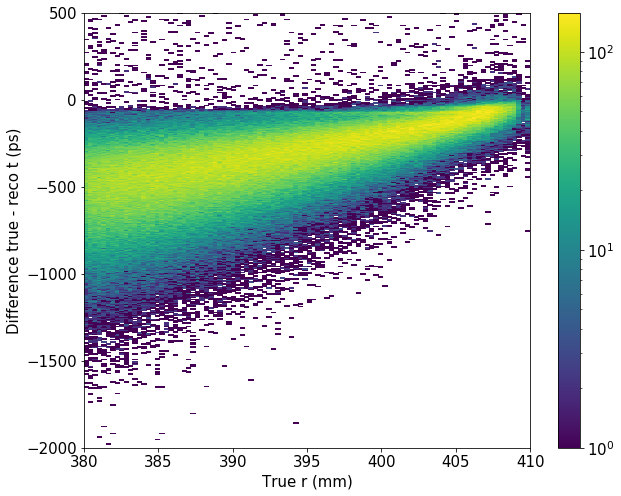

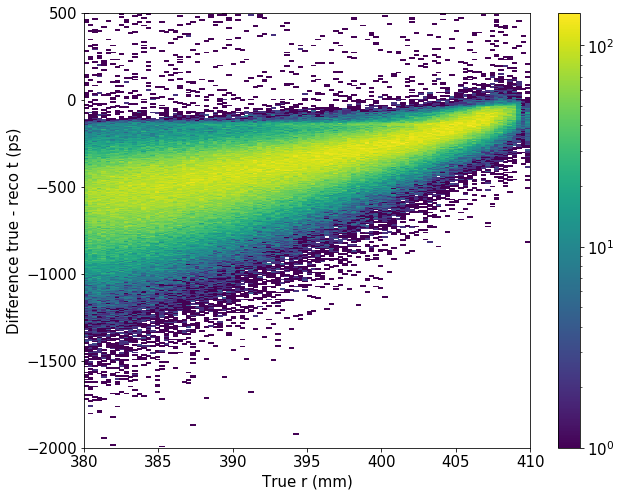

In [105]:
for j,th in enumerate(np.arange(0,2, 0.5)):    
    plt.hist2d(true_r, diff_reco_t_matrix[j][0], bins=(100, 500), range=((380, 410), (-2000, 500)),
               norm=mp_colors.LogNorm())
    plt.xlabel('True r (mm)');
    plt.ylabel('Difference true - reco t (ps)')
    plt.colorbar()
    plt.show()

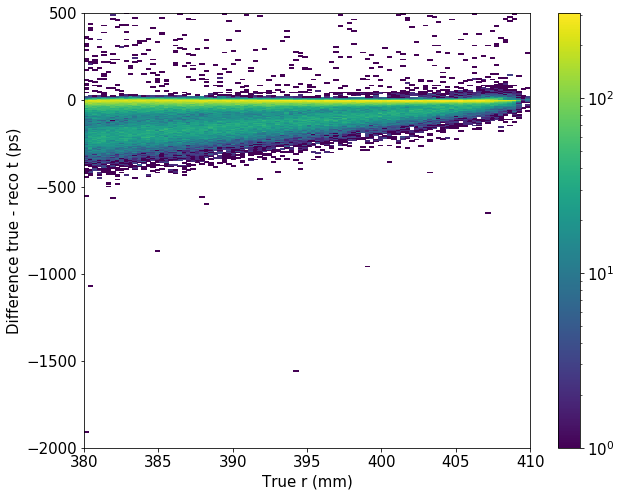

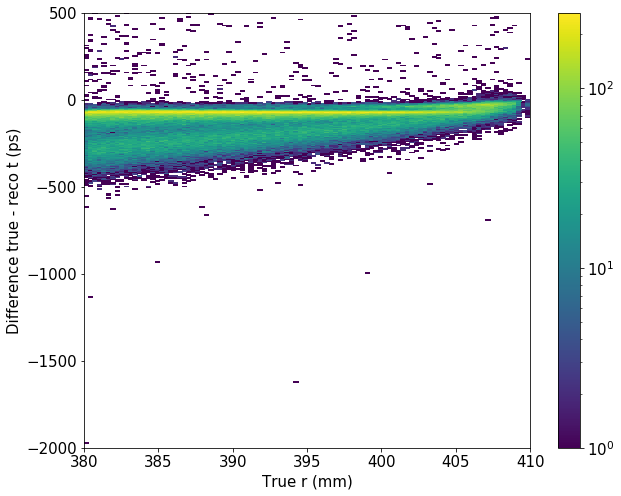

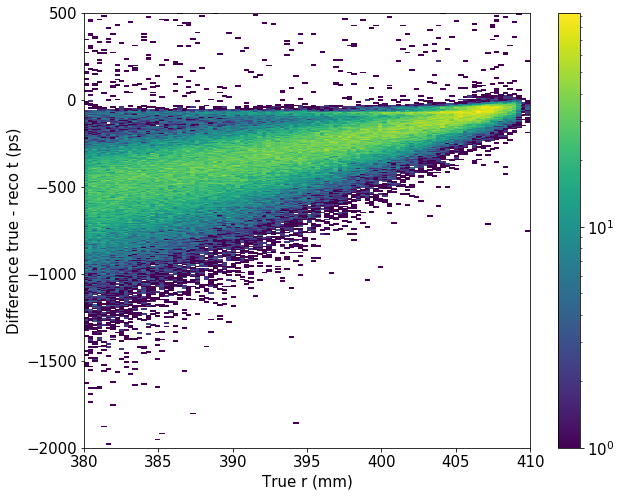

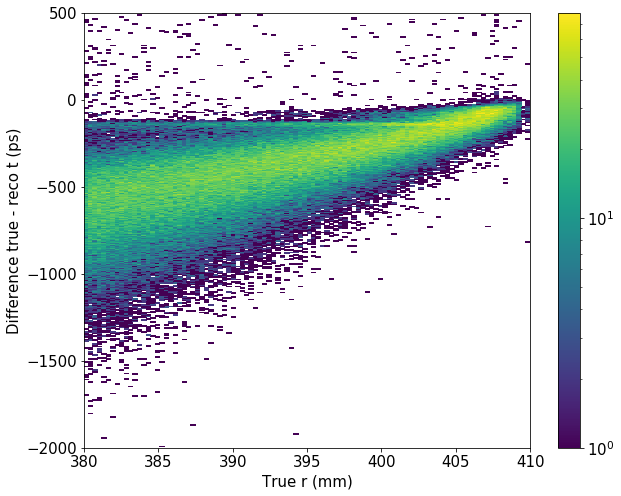

In [106]:
for j,th in enumerate(np.arange(0,2, 0.5)):
    plt.hist2d(true_r[sel_phot_like], diff_reco_t_matrix[j][0][sel_phot_like],
               bins=(100, 500), range=((380, 410), (-2000, 500)),
               norm=mp_colors.LogNorm())
    plt.xlabel('True r (mm)');
    plt.ylabel('Difference true - reco t (ps)')
    plt.colorbar()
    plt.show()

In [107]:
true_t2

array([1632.53939152, 1167.04535484, 1670.6430912 , ..., 1518.82457733,
       2003.3288002 , 1268.48483086])

In [109]:
for j in range(4):
    d1_t = true_t1 - sipm_t1[j]
    d2_t = true_t2 - sipm_t2[j]
    reco_t1   = np.array(sipm_t1[j]) - (np.array(dist1[j])/ave_speed_in_LXe)
    reco_t2   = np.array(sipm_t2[j]) - (np.array(dist2[j])/ave_speed_in_LXe)
    d1_reco_t = true_t1 - reco_t1
    d2_reco_t = true_t2 - reco_t2

    var = true_t2 - reco_t2[0]
    phot_evts = events[phot2 == True]
    #print(phot_evts[var[phot2 == True] < -200])

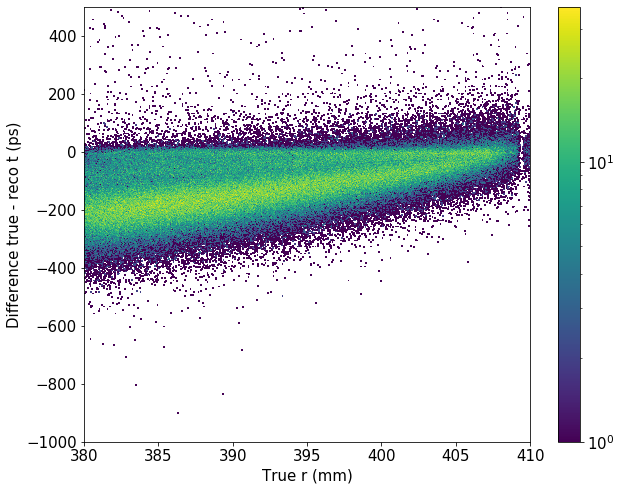

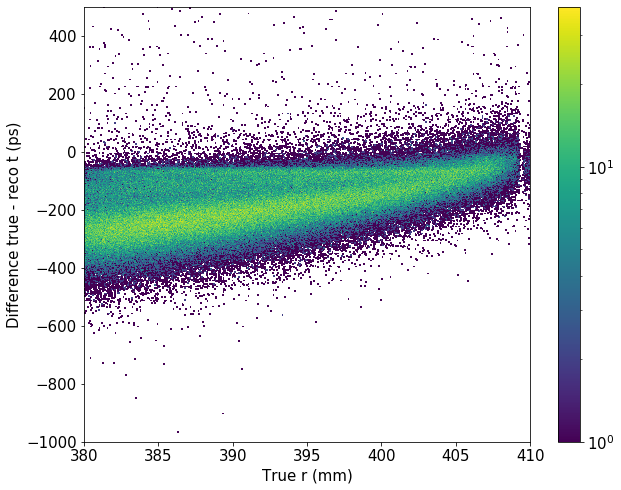

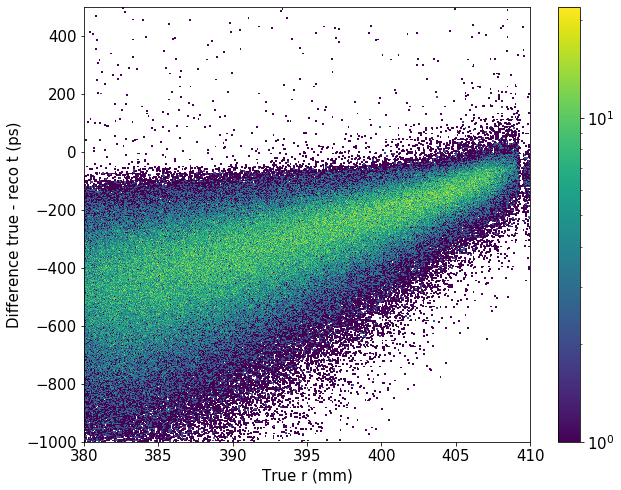

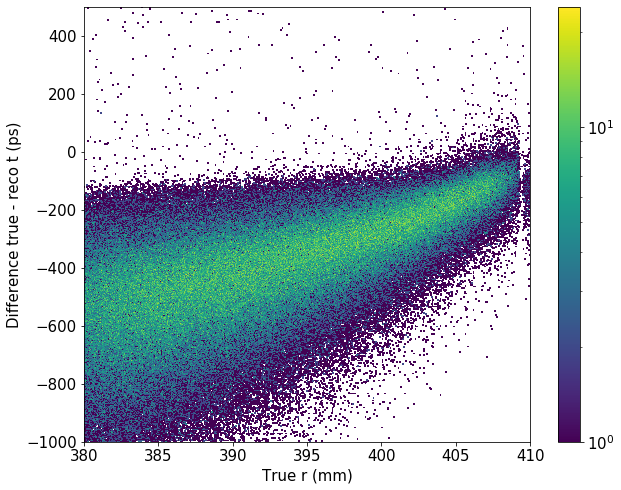

In [110]:
for j in range(4):
    plt.hist2d(true_r[sel_compt_like], \
               diff_reco_t_matrix[j][0][sel_compt_like], \
               bins=(500, 500), range=((380, 410), (-1000, 500)), norm=mp_colors.LogNorm())
    plt.xlabel('True r (mm)');
    plt.ylabel('Difference true - reco t (ps)')
    plt.colorbar()
    plt.show()

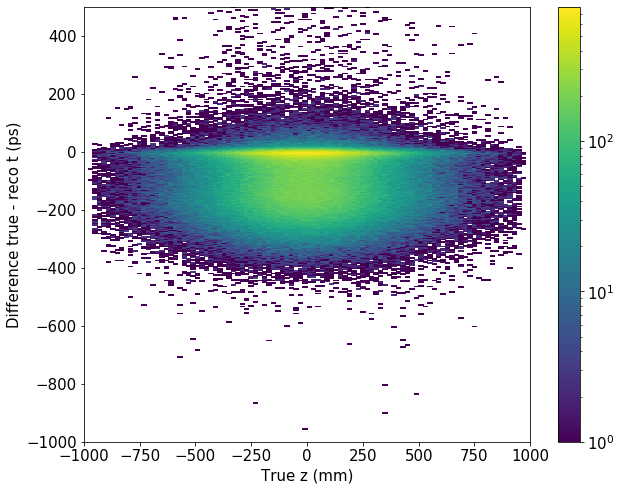

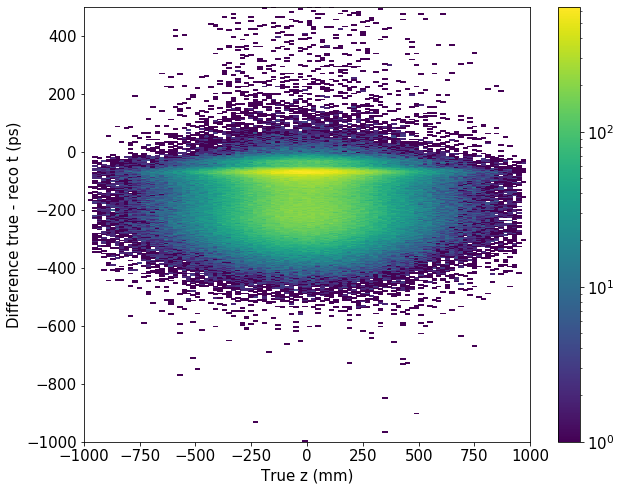

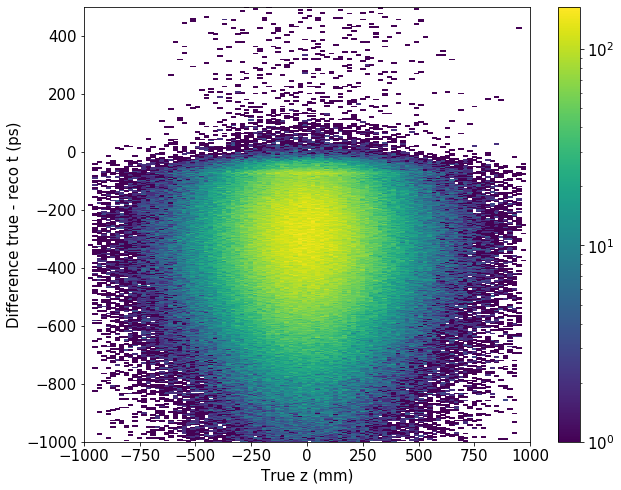

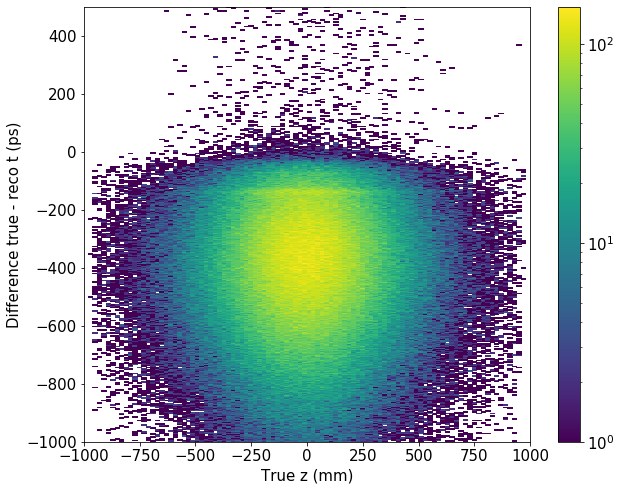

In [111]:
for j in range(4):
    plt.hist2d(true_z, diff_reco_t_matrix[j][0], bins=(100, 500), range=((-1000, 1000), (-1000, 500)),
               norm=mp_colors.LogNorm())
    plt.xlabel('True z (mm)');
    plt.ylabel('Difference true - reco t (ps)')
    plt.colorbar()
    plt.show()

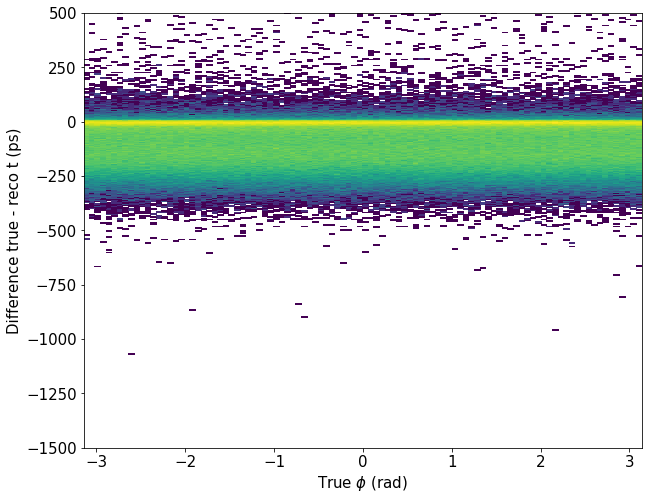

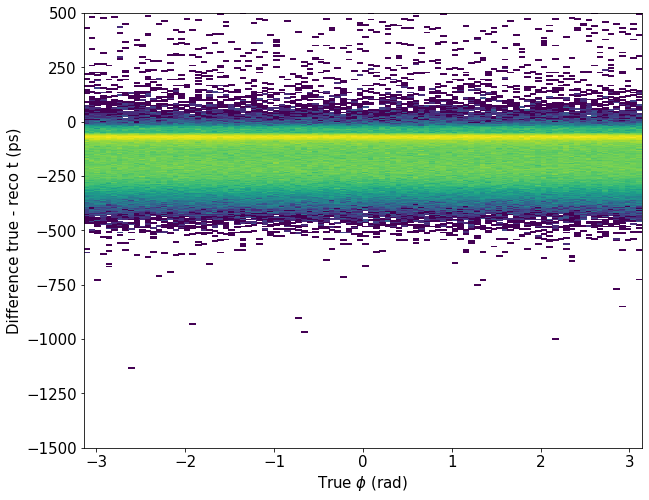

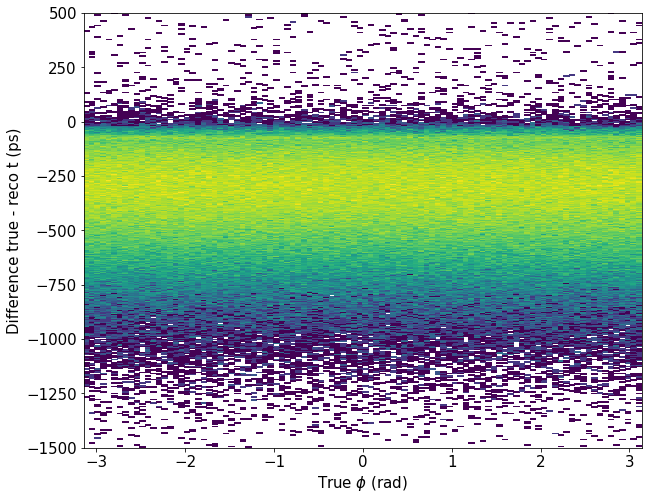

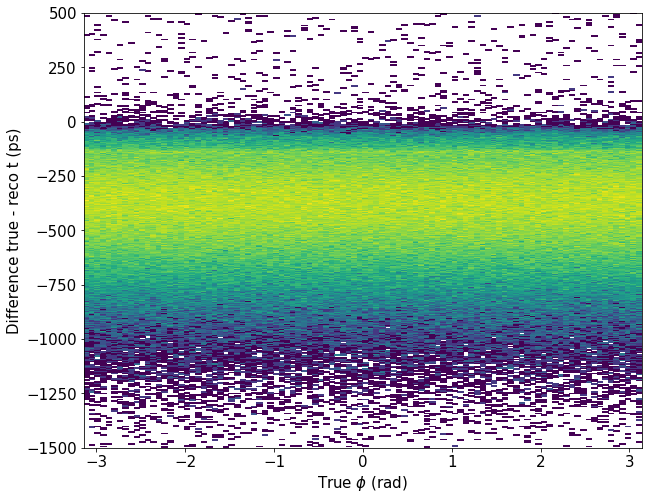

In [112]:
for j in range(4):
    plt.hist2d(true_phi, diff_reco_t_matrix[j][0], bins=(100, 500), range=((-3.14, 3.14), (-1500, 500)),
               norm=mp_colors.LogNorm())
    plt.xlabel('True $\phi$ (rad)');
    plt.ylabel('Difference true - reco t (ps)')
    plt.show()

## True-true correlation

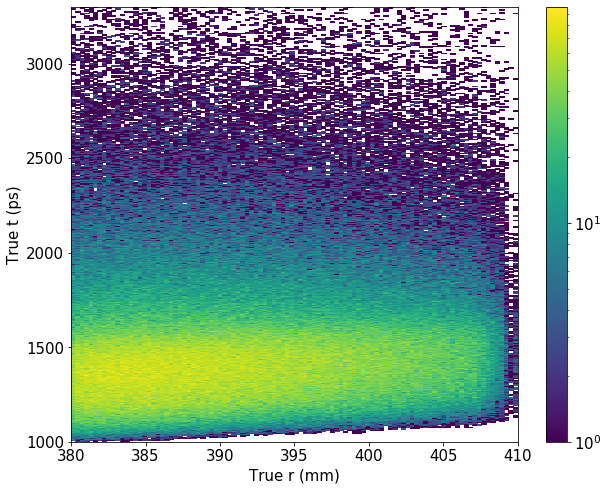

In [113]:
plt.hist2d(true_r, true_t, bins=(100, 500), range=((380, 410), (1000, 3300)), norm=mp_colors.LogNorm())
plt.xlabel('True r (mm)')
plt.ylabel('True t (ps)')
plt.colorbar();

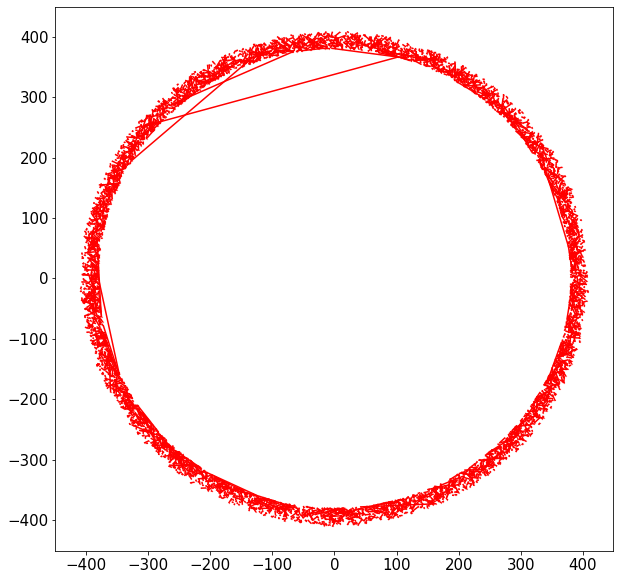

In [116]:
fig = plt.figure(1)
fig.set_figwidth(10.)
fig.set_figheight(10)

for i in range(0, 5000):
    my_x, my_y = [], []
    my_x.append(reco_x[i:i+1])
    my_x.append(true_x[i:i+1])
    my_y.append(reco_y[i:i+1])
    my_y.append(true_y[i:i+1])
    plt.plot(my_x, my_y, 'ro-', markersize=0.2)
    
plt.show()